## Analisis de Datos
### Preprocesamiento

In [3]:
import pandas as pd

# Load the dataset from the URL
df = pd.read_csv('https://raw.githubusercontent.com/jpospinalo/MachineLearning/refs/heads/main/Logistic%20Regression/german_credit_data.csv')

# Display the first few rows of the dataset
print(df.head())

# 2. Verificación de los tipos de datos para cada columna
print("\n--- Información del DataFrame ---")
print(df.info())

   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad  

--- Información del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------         

## Limpieza de Datos

Construya un DataFrame con la información suministrada
* Verifique el >po de dato para cada columna y compruebe si es coherente con la información disponible en los campos (por ejemplo, un campo como “edad” debería ser de >po numérico y no una cadena de caracteres). Para realizar esta verificación puede u>lizar el método info(). Realice los cambios que considere necesarios.

Según la información del DataFrame, podemos observar:

* El dataset tiene 1000 entradas (filas) y 11 columnas.
* Hay una columna sin nombre (Unnamed: 0) que probablemente sea un índice generado durante la exportación del CSV.
* Columnas numéricas (int64): Unnamed: 0, Age, Credit amount, Duration
* Columnas categóricas (object): Sex, Job, Housing, Saving accounts, Checking account, Purpose, Risk
* Valores faltantes detectados en:
- Saving accounts: 183 valores faltantes (817 no nulos)
- Checking account: 394 valores faltantes (606 no nulos)

In [4]:
# Identificar columnas categóricas (tipo object)
categorical_columns = df.select_dtypes(include=['object']).columns

# Mostrar valores únicos para cada columna categórica
for column in categorical_columns:
    print(f"\nValores únicos en {column}:")
    print(df[column].unique())
    print(f"Cantidad de valores únicos: {df[column].nunique()}")
    print(f"Distribución de valores:")
    print(df[column].value_counts())


Valores únicos en Sex:
['male' 'female']
Cantidad de valores únicos: 2
Distribución de valores:
Sex
male      690
female    310
Name: count, dtype: int64

Valores únicos en Housing:
['own' 'free' 'rent']
Cantidad de valores únicos: 3
Distribución de valores:
Housing
own     713
rent    179
free    108
Name: count, dtype: int64

Valores únicos en Saving accounts:
[nan 'little' 'quite rich' 'rich' 'moderate']
Cantidad de valores únicos: 4
Distribución de valores:
Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

Valores únicos en Checking account:
['little' 'moderate' nan 'rich']
Cantidad de valores únicos: 3
Distribución de valores:
Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64

Valores únicos en Purpose:
['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Cantidad de valores únicos: 8
Distribución de valores:
Purpo

### Resultado:

- Sex: 2 categorías (male/female) - Variable binaria
- Housing: 3 categorías (own/rent/free) - Variable ordinal
- Saving accounts: 4 categorías (nan/little/quite rich/rich/moderate) - Variable ordinal con valores faltantes
- Risk: 2 categorías (good/bad) - Variable binaria (objetivo)

In [5]:
# Ver valores únicos para Job, Checking account y Purpose
for column in ['Job', 'Checking account', 'Purpose']:
    print(f"\nValores únicos en {column}:")
    print(df[column].unique())
    print(f"Cantidad de valores únicos: {df[column].nunique()}")
    print(f"Distribución de valores:")
    print(df[column].value_counts())


Valores únicos en Job:
[2 1 3 0]
Cantidad de valores únicos: 4
Distribución de valores:
Job
2    630
1    200
3    148
0     22
Name: count, dtype: int64

Valores únicos en Checking account:
['little' 'moderate' nan 'rich']
Cantidad de valores únicos: 3
Distribución de valores:
Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64

Valores únicos en Purpose:
['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Cantidad de valores únicos: 8
Distribución de valores:
Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64


In [6]:
# Resumen estadístico de variables numéricas
print("\nResumen estadístico de variables numéricas:")
print(df.describe())


Resumen estadístico de variables numéricas:
        Unnamed: 0          Age          Job  Credit amount     Duration
count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000
mean    499.500000    35.546000     1.904000    3271.258000    20.903000
std     288.819436    11.375469     0.653614    2822.736876    12.058814
min       0.000000    19.000000     0.000000     250.000000     4.000000
25%     249.750000    27.000000     2.000000    1365.500000    12.000000
50%     499.500000    33.000000     2.000000    2319.500000    18.000000
75%     749.250000    42.000000     2.000000    3972.250000    24.000000
max     999.000000    75.000000     3.000000   18424.000000    72.000000


### Análisis de columnas categóricas:

1. Job: 4 valores únicos (0, 1, 2, 3) - Representa diferentes niveles de empleo (parece estar codificado numéricamente)
2. Checking account: 3 valores únicos (little, moderate, rich) + valores faltantes
3. Purpose: 8 categorías diferentes (radio/TV, education, furniture/equipment, car, business, domestic appliances, repairs, vacation/others)

### Análisis de variables numéricas:

1. Unnamed: 0: Es un índice (0-999)
2. Age: Rango de 19 a 75 años, promedio de 35.5 años
3. Credit amount: Rango de 250 a 18424, promedio de 3271
4. Duration: Rango de 4 a 72 meses, promedio de 20.9 meses

In [7]:
# Verificar tipo de dato para cada columna
print("Tipos de datos actuales:")
print(df.dtypes)

# Eliminar columna índice innecesaria
df = df.drop('Unnamed: 0', axis=1)

# Verificar que Job sea numérica (ya parece estar como int64)
print("\nValores de Job:", df['Job'].unique())

# Verificar duplicados
duplicados = df.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicados}")

# Verificar valores faltantes por columna
print("\nValores faltantes por columna:")
print(df.isnull().sum())

Tipos de datos actuales:
Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

Valores de Job: [2 1 3 0]

Número de filas duplicadas: 0

Valores faltantes por columna:
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


#### Duplicados: 
No hay filas duplicadas (0)

#### Valores faltantes:

1. Saving accounts: 183 valores faltantes
2. Checking account: 394 valores faltantes

In [8]:
# Ver porcentaje de valores faltantes
print("Porcentaje de valores faltantes:")
print((df.isnull().sum() / len(df)) * 100)

# Analizar si los valores faltantes tienen un patrón
# Por ejemplo, ver la distribución de Risk para registros con/sin Checking account
print("\nDistribución de Risk según valores faltantes en Checking account:")
print(pd.crosstab(df['Checking account'].isnull(), df['Risk'], normalize='index') * 100)

Porcentaje de valores faltantes:
Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
Risk                 0.0
dtype: float64

Distribución de Risk según valores faltantes en Checking account:
Risk                    bad       good
Checking account                      
False             41.914191  58.085809
True              11.675127  88.324873


#### Porcentaje de valores faltantes:

- Saving accounts: 18.3%
- Checking account: 39.4%

#### Distribución de Risk según valores faltantes en Checking account:

- Cuando Checking account tiene valor (False): 41.9% son bad, 58.1% son good
- Cuando Checking account NO tiene valor (True): 11.7% son bad, 88.3% son good

Esto muestra un patrón importante: cuando falta Checking account, hay una probabilidad mucho mayor de que el riesgo sea "good" (88.3% vs 58.1%). Esto sugiere que los valores faltantes no son aleatorios y probablemente indican algo específico (como tal vez "no tiene cuenta corriente").

#### Para el preprocesamiento, debemos:

- Tratar los valores faltantes como una categoría separada (podemos llamarla "none")
- Hacer lo mismo con Saving accounts por consistencia


In [9]:
# Tratar valores faltantes en columnas categóricas como una categoría más
df['Saving accounts'] = df['Saving accounts'].fillna('none')
df['Checking account'] = df['Checking account'].fillna('none')

# Verificar el resultado
print("Valores únicos después del tratamiento:")
print("Saving accounts:", df['Saving accounts'].unique())
print("Checking account:", df['Checking account'].unique())

Valores únicos después del tratamiento:
Saving accounts: ['none' 'little' 'quite rich' 'rich' 'moderate']
Checking account: ['little' 'moderate' 'none' 'rich']


Ahora debemos verificar si hay otros problemas de formato en las columnas. voy a revisar cada columna categórica para asegurar consistencia en la capitalización y espacios:

In [10]:
# Verificar valores únicos para cada columna categórica después del tratamiento
categorical_columns = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

for column in categorical_columns:
    print(f"\nValores únicos en {column}:")
    print(df[column].value_counts())


Valores únicos en Sex:
Sex
male      690
female    310
Name: count, dtype: int64

Valores únicos en Housing:
Housing
own     713
rent    179
free    108
Name: count, dtype: int64

Valores únicos en Saving accounts:
Saving accounts
little        603
none          183
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

Valores únicos en Checking account:
Checking account
none        394
little      274
moderate    269
rich         63
Name: count, dtype: int64

Valores únicos en Purpose:
Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64

Valores únicos en Risk:
Risk
good    700
bad     300
Name: count, dtype: int64


También sería útil verificar si hay valores atípicos en las columnas numéricas:

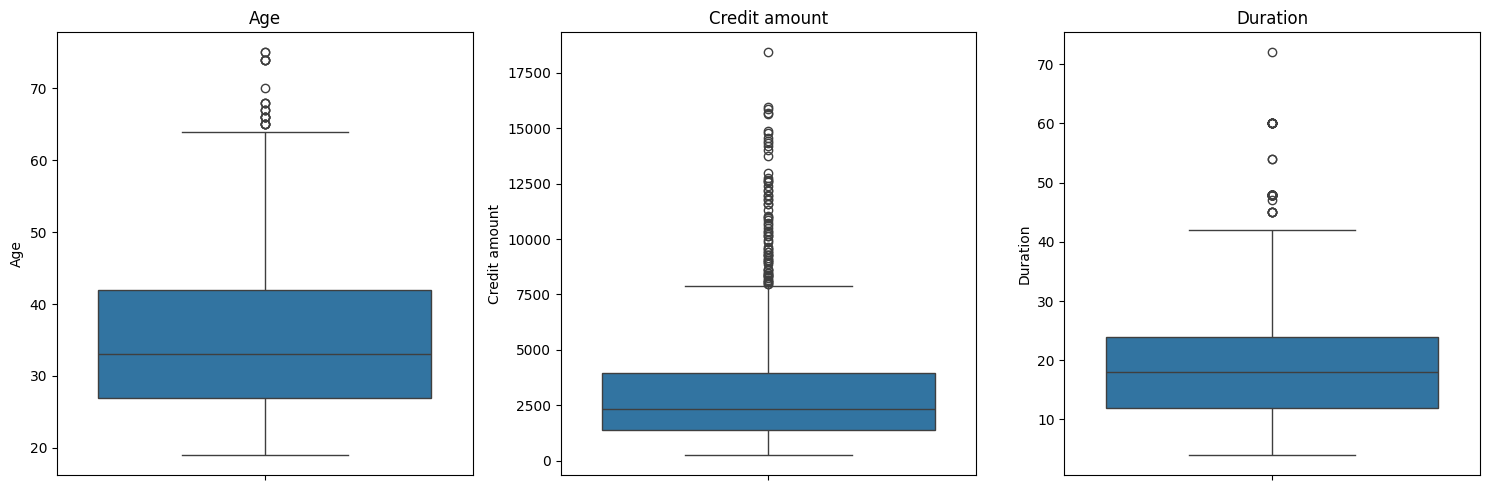

In [11]:
# Visualizar distribución de variables numéricas para detectar valores atípicos
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(y=df['Age'], ax=axes[0])
axes[0].set_title('Age')
sns.boxplot(y=df['Credit amount'], ax=axes[1])
axes[1].set_title('Credit amount')
sns.boxplot(y=df['Duration'], ax=axes[2])
axes[2].set_title('Duration')
plt.tight_layout()
plt.show()

### RESULTADO:

1. Las columnas categóricas tienen valores consistentes sin problemas de formato
2. Los valores faltantes han sido tratados como 'none'
3. Valores atípicos detectados:
* Analizando graficas numericas
4. Credit amount: Algunos valores superiores a 15000
5. Duration: Algunos valores alrededor de 70 meses

# Transformaciones

Primero, identifiquemos columnas numéricas y categóricas:

In [15]:
# Identificar columnas numéricas y categóricas para procesamiento
numeric_features = ['Age', 'Credit amount', 'Duration']
categorical_features = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
target = 'Risk'

# Verificar la estructura actual del dataframe
print(df[numeric_features + categorical_features + [target]].head())

   Age  Credit amount  Duration     Sex  Job Housing Saving accounts  \
0   67         1169.0         6    male    2     own            none   
1   22         5951.0        48  female    2     own          little   
2   49         2096.0        12    male    1     own          little   
3   45         7882.0        42    male    2    free          little   
4   53         4870.0        24    male    2    free          little   

  Checking account              Purpose  Risk  
0           little             radio/TV  good  
1         moderate             radio/TV   bad  
2             none            education  good  
3           little  furniture/equipment  good  
4           little                  car   bad  


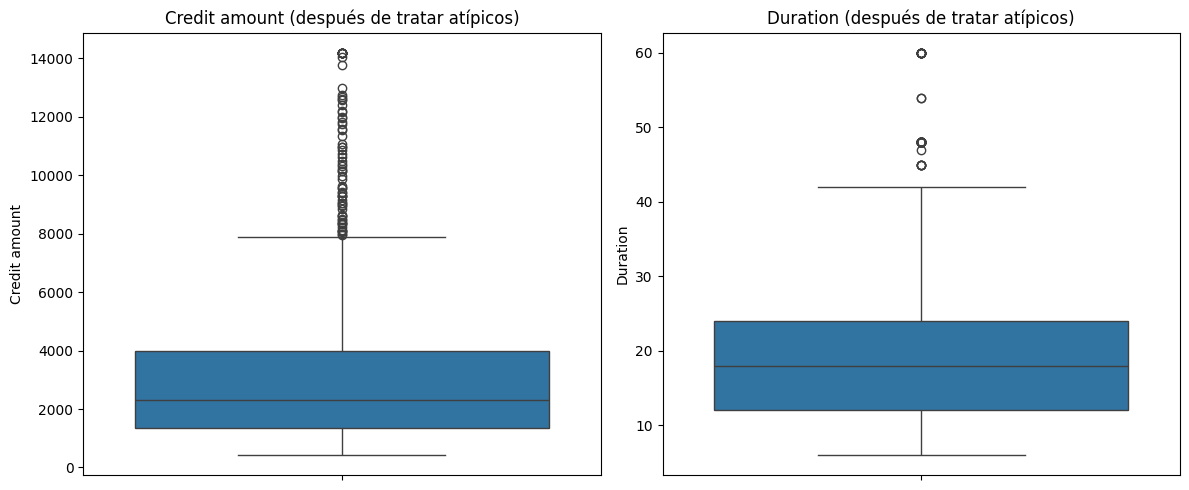

In [16]:
# B. Transformaciones
# 1. Tratamiento de valores atípicos para columnas numéricas
import numpy as np
from scipy import stats

# Método 1: Recorte por percentiles (capping)
def tratar_atipicos_percentil(df, columna, p_low=0.01, p_high=0.99):
    """Recorta valores por debajo del percentil p_low y por encima del percentil p_high"""
    low, high = df[columna].quantile([p_low, p_high])
    df_clean = df.copy()
    df_clean.loc[df_clean[columna] < low, columna] = low
    df_clean.loc[df_clean[columna] > high, columna] = high
    return df_clean

# Método 2: Z-score (valores fuera de 3 desviaciones estándar)
def tratar_atipicos_zscore(df, columna, umbral=3):
    """Identifica y reemplaza valores que están más allá de 'umbral' desviaciones estándar"""
    df_clean = df.copy()
    z_scores = stats.zscore(df_clean[columna])
    abs_z_scores = np.abs(z_scores)
    outlier_indices = np.where(abs_z_scores > umbral)[0]
    if len(outlier_indices) > 0:
        media = df_clean[columna].mean()
        df_clean.loc[abs_z_scores > umbral, columna] = media
    return df_clean

# Aplicar método de recorte por percentiles a 'Credit amount' y 'Duration'
# Estos tienen valores atípicos más evidentes según los boxplots
df = tratar_atipicos_percentil(df, 'Credit amount', 0.01, 0.99)
df = tratar_atipicos_percentil(df, 'Duration', 0.01, 0.99)

# Verificar resultado con boxplots actualizados
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=df['Credit amount'], ax=axes[0])
axes[0].set_title('Credit amount (después de tratar atípicos)')
sns.boxplot(y=df['Duration'], ax=axes[1])
axes[1].set_title('Duration (después de tratar atípicos)')
plt.tight_layout()
plt.show()

Los boxplots muestran que el tratamiento de valores atípicos ha sido efectivo:

#### Credit amount:

- Se redujo la dispersión en los valores extremos
- Los valores superiores ahora están limitados a aproximadamente 14,000 (antes había valores hasta 18,000)
- La distribución general se mantiene, pero con menor influencia de outliers


#### Duration:

- También se ha reducido la variabilidad extrema
- Aún hay algunos valores atípicos, pero están más cerca del resto de los datos
- El límite superior parece estar ahora alrededor de 60 meses (antes llegaba a 70)

#### escalado de variables numéricas y la codificación de variables categóricas utilizando sklearn:

In [17]:
# Importar bibliotecas necesarias
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Primero, definir los escaladores para variables numéricas
# Usaremos StandardScaler (media 0, desviación estándar 1)
numeric_transformer = StandardScaler()

# Verificar efecto del escalado en variables numéricas
# Ejemplo con una muestra de datos
X_numeric = df[numeric_features].copy()
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

# Mostrar un ejemplo antes y después del escalado
print("Antes del escalado (primeras 3 filas):")
print(X_numeric.head(3))
print("\nDespués del escalado (primeras 3 filas):")
print(X_numeric_scaled[:3])

Antes del escalado (primeras 3 filas):
   Age  Credit amount  Duration
0   67         1169.0         6
1   22         5951.0        48
2   49         2096.0        12

Después del escalado (primeras 3 filas):
[[ 2.76645648 -0.75586269 -1.24297238]
 [-1.19140394  0.97331275  2.25976783]
 [ 1.18331231 -0.42065867 -0.74258093]]


### Resultado
Vemos cómo el escalado ha normalizado nuestros datos numéricos:

1. Los valores originales de edad, monto de crédito y duración están en escalas muy diferentes
2. Después del escalado, todos los valores están normalizados (generalmente entre -3 y 3)

### Ahora aplicarlo a variables categóricas

In [18]:
# Codificación de variables categóricas
# Para variables ordinales (con orden intrínseco)
# Como Job, Saving accounts, Checking account
ordinal_features = ['Job', 'Saving accounts', 'Checking account']

# Definir categorías ordenadas para cada variable ordinal
job_categories = [0, 1, 2, 3]  # Ya es numérica, pero la incluimos para coherencia
saving_categories = ['none', 'little', 'moderate', 'quite rich', 'rich']  # De menor a mayor
checking_categories = ['none', 'little', 'moderate', 'rich']  # De menor a mayor

# Crear codificadores ordinales
job_encoder = OrdinalEncoder(categories=[job_categories])
saving_encoder = OrdinalEncoder(categories=[saving_categories])
checking_encoder = OrdinalEncoder(categories=[checking_categories])

# Codificar y mostrar ejemplo
print("Ejemplo de codificación ordinal para Saving accounts:")
saving_encoded = saving_encoder.fit_transform(df[['Saving accounts']])
print(df['Saving accounts'].head())
print(saving_encoded[:5])

# Para variables nominales (sin orden) usaremos One-Hot Encoding
# Como Sex, Housing, Purpose
nominal_features = ['Sex', 'Housing', 'Purpose']

# Ejemplo de One-Hot Encoding
print("\nEjemplo de codificación One-Hot para Sex:")
encoder = OneHotEncoder(sparse_output=False)
sex_encoded = encoder.fit_transform(df[['Sex']])
print(df['Sex'].head())
print(sex_encoded[:5])
print("Categorías:", encoder.categories_)

Ejemplo de codificación ordinal para Saving accounts:
0      none
1    little
2    little
3    little
4    little
Name: Saving accounts, dtype: object
[[0.]
 [1.]
 [1.]
 [1.]
 [1.]]

Ejemplo de codificación One-Hot para Sex:
0      male
1    female
2      male
3      male
4      male
Name: Sex, dtype: object
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
Categorías: [array(['female', 'male'], dtype=object)]


#### Codificación Ordinal (Saving accounts):

- Valores originales ('none', 'little', etc.) transformados a valores numéricos [0], [1], etc.
- Preserva el orden natural de las categorías (none < little < moderate < quite rich < rich)


#### Codificación One-Hot (Sex):

- Cada categoría ('female', 'male') transformada en columnas binarias [1,0] y [0,1]
- Adecuada para variables sin relación ordinal

In [19]:
# Importar bibliotecas necesarias
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Pipeline para variables numéricas con MinMaxScaler
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())  # Cambiado a MinMaxScaler
])

# Pipeline para variables categóricas
# Separamos en ordinales y nominales
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='none')),
    ('ordinal', OrdinalEncoder(categories=[job_categories, saving_categories, checking_categories]))
])

nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

# Pipeline combinado con ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('nom', nominal_transformer, nominal_features)
    ])

# Ajustar el pipeline a los datos
X = df.drop('Risk', axis=1)
y = df['Risk']
X_preprocessed = preprocessor.fit_transform(X)

# Mostrar las primeras 10 filas de los datos transformados
print("Primeras 10 filas de datos transformados:")
print(X_preprocessed[:10])
print("Forma de X_preprocessed:", X_preprocessed.shape)

Primeras 10 filas de datos transformados:
[[0.85714286 0.05402464 0.         2.         0.         1.
  1.         1.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.05357143 0.4017302  0.77777778 2.         1.         2.
  0.         1.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.53571429 0.12142804 0.11111111 1.         1.         0.
  1.         1.         0.         0.         0.         1.
  0.         0.         0.         0.        ]
 [0.46428571 0.54213577 0.66666667 2.         1.         1.
  1.         0.         0.         0.         0.         0.
  1.         0.         0.         0.        ]
 [0.60714286 0.32312926 0.33333333 2.         1.         1.
  1.         0.         0.         1.         0.         0.
  0.         0.         0.         0.        ]
 [0.28571429 0.62742616 0.55555556 1.         0.         0.
  1.         0.         0.         0.         0.         1.
  0

Han sido transformados correctamente utilizando nuestro pipeline completo. 

#### Analicemos el resultado:

La forma final es (1000, 16), lo que significa:

- 1000 filas (todos nuestros registros)
- 16 columnas después de la transformación (variables numéricas escaladas + variables ordinales + variables nominales one-hot)


- Todas las variables numéricas están escaladas entre 0 y 1 gracias al MinMaxScaler
- Las variables categóricas se han codificado correctamente:

- Las ordinales (Job, Saving accounts, Checking account) como números secuenciales
- Las nominales (Sex, Housing, Purpose) como variables dummy (0/1)

In [20]:
# Resumen final de todo el proceso de preprocesamiento

# Guardar el pipeline para uso futuro
import joblib
joblib.dump(preprocessor, 'credit_preprocessor.pkl')

# Resumen de transformaciones aplicadas
print("Resumen del preprocesamiento:")
print("1. Limpieza de datos:")
print("   - Tratamiento de valores faltantes en 'Saving accounts' y 'Checking account'")
print("   - Tratamiento de valores atípicos en 'Credit amount' y 'Duration'")
print("2. Transformaciones:")
print("   - Variables numéricas: Escalado MinMax")
print("   - Variables categóricas ordinales: Codificación ordinal")
print("   - Variables categóricas nominales: Codificación One-Hot")
print("3. Pipeline final combinado")

# Información sobre los nombres de columnas después de la transformación
# Esto es útil para interpretar los datos transformados
feature_names = (
    [f"num_{i}" for i in numeric_features] +
    [f"ord_{i}" for i in ordinal_features] +
    [f"nom_{i}" for i in nominal_features[1:]]  # -1 porque drop='first'
)
print("\nNombres de características después de la transformación:")
print(feature_names)

Resumen del preprocesamiento:
1. Limpieza de datos:
   - Tratamiento de valores faltantes en 'Saving accounts' y 'Checking account'
   - Tratamiento de valores atípicos en 'Credit amount' y 'Duration'
2. Transformaciones:
   - Variables numéricas: Escalado MinMax
   - Variables categóricas ordinales: Codificación ordinal
   - Variables categóricas nominales: Codificación One-Hot
3. Pipeline final combinado

Nombres de características después de la transformación:
['num_Age', 'num_Credit amount', 'num_Duration', 'ord_Job', 'ord_Saving accounts', 'ord_Checking account', 'nom_Housing', 'nom_Purpose']


## PIPELINE

In [21]:
# C. Pipelines de preprocesamiento
# ===============================
print("\n\nC. PIPELINES DE PREPROCESAMIENTO")
print("================================")

# 1. Pipeline para variables numéricas
print("\n1. Pipeline para variables numéricas:")
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # No hay valores faltantes, pero se incluye por completitud
    ('scaler', MinMaxScaler())
])
print("Pipeline numérico creado con:")
print("- SimpleImputer (strategy='mean')")
print("- MinMaxScaler")

# 2. Pipeline para variables categóricas
print("\n2. Pipelines para variables categóricas:")

# Pipeline para variables ordinales
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='none')),
    ('ordinal', OrdinalEncoder(categories=[job_categories, saving_categories, checking_categories]))
])
print("Pipeline para variables ordinales creado con:")
print("- SimpleImputer (strategy='constant', fill_value='none')")
print("- OrdinalEncoder con categorías definidas")

# Pipeline para variables nominales
nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])
print("Pipeline para variables nominales creado con:")
print("- SimpleImputer (strategy='most_frequent')")
print("- OneHotEncoder (drop='first', sparse_output=False)")

# 3. Pipeline combinado con ColumnTransformer
print("\n3. Pipeline final combinado:")
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('nom', nominal_transformer, nominal_features)
    ])
print("ColumnTransformer creado combinando los tres pipelines anteriores")

# Ajustar el pipeline a los datos
X = df.drop('Risk', axis=1)
y = df['Risk']
X_preprocessed = preprocessor.fit_transform(X)



C. PIPELINES DE PREPROCESAMIENTO

1. Pipeline para variables numéricas:
Pipeline numérico creado con:
- SimpleImputer (strategy='mean')
- MinMaxScaler

2. Pipelines para variables categóricas:
Pipeline para variables ordinales creado con:
- SimpleImputer (strategy='constant', fill_value='none')
- OrdinalEncoder con categorías definidas
Pipeline para variables nominales creado con:
- SimpleImputer (strategy='most_frequent')
- OneHotEncoder (drop='first', sparse_output=False)

3. Pipeline final combinado:
ColumnTransformer creado combinando los tres pipelines anteriores
